C:\Users\pierr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8540 - loss: 0.4952 - val_accuracy: 0.9637 - val_loss: 0.1274
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9537 - loss: 0.1566 - val_accuracy: 0.9707 - val_loss: 0.0978
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9656 - loss: 0.1146 - val_accuracy: 0.9747 - val_loss: 0.0824
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9712 - loss: 0.0932 - val_accuracy: 0.9767 - val_loss: 0.0754
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9759 - loss: 0.0785 - val_accuracy: 0.9812 - val_loss: 0.0689
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.9738 - loss: 0.0851
Test accuracy: 0.9779999852180481
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


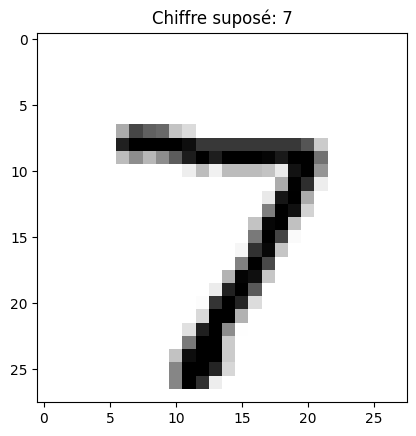

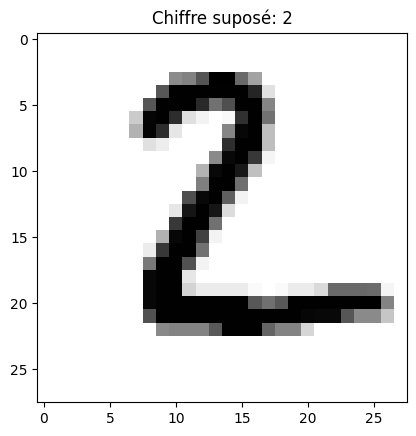

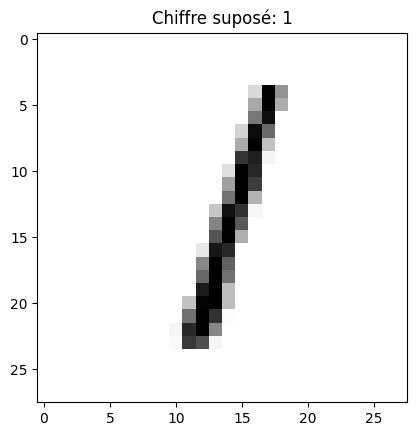

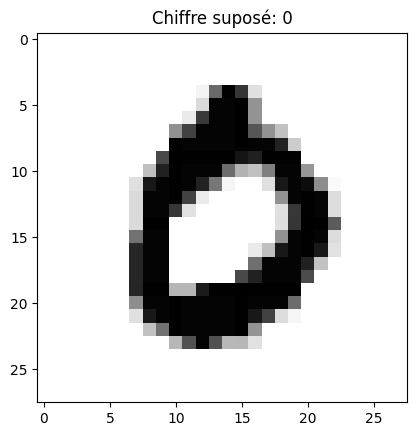

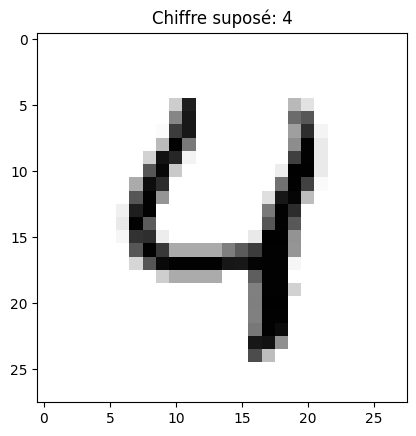

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Chargement des données MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisation des données pour faciliter l'apprentissage du réseau
x_train, x_test = x_train / 255.0, x_test / 255.0

# Création d'un modèle simple de réseau de neurones multicouches
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Évaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Prédiction et visualisation des résultats
predictions = model.predict(x_test[:5])

for i, prediction in enumerate(predictions):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Chiffre suposé: {prediction.argmax()}")
    plt.show()
